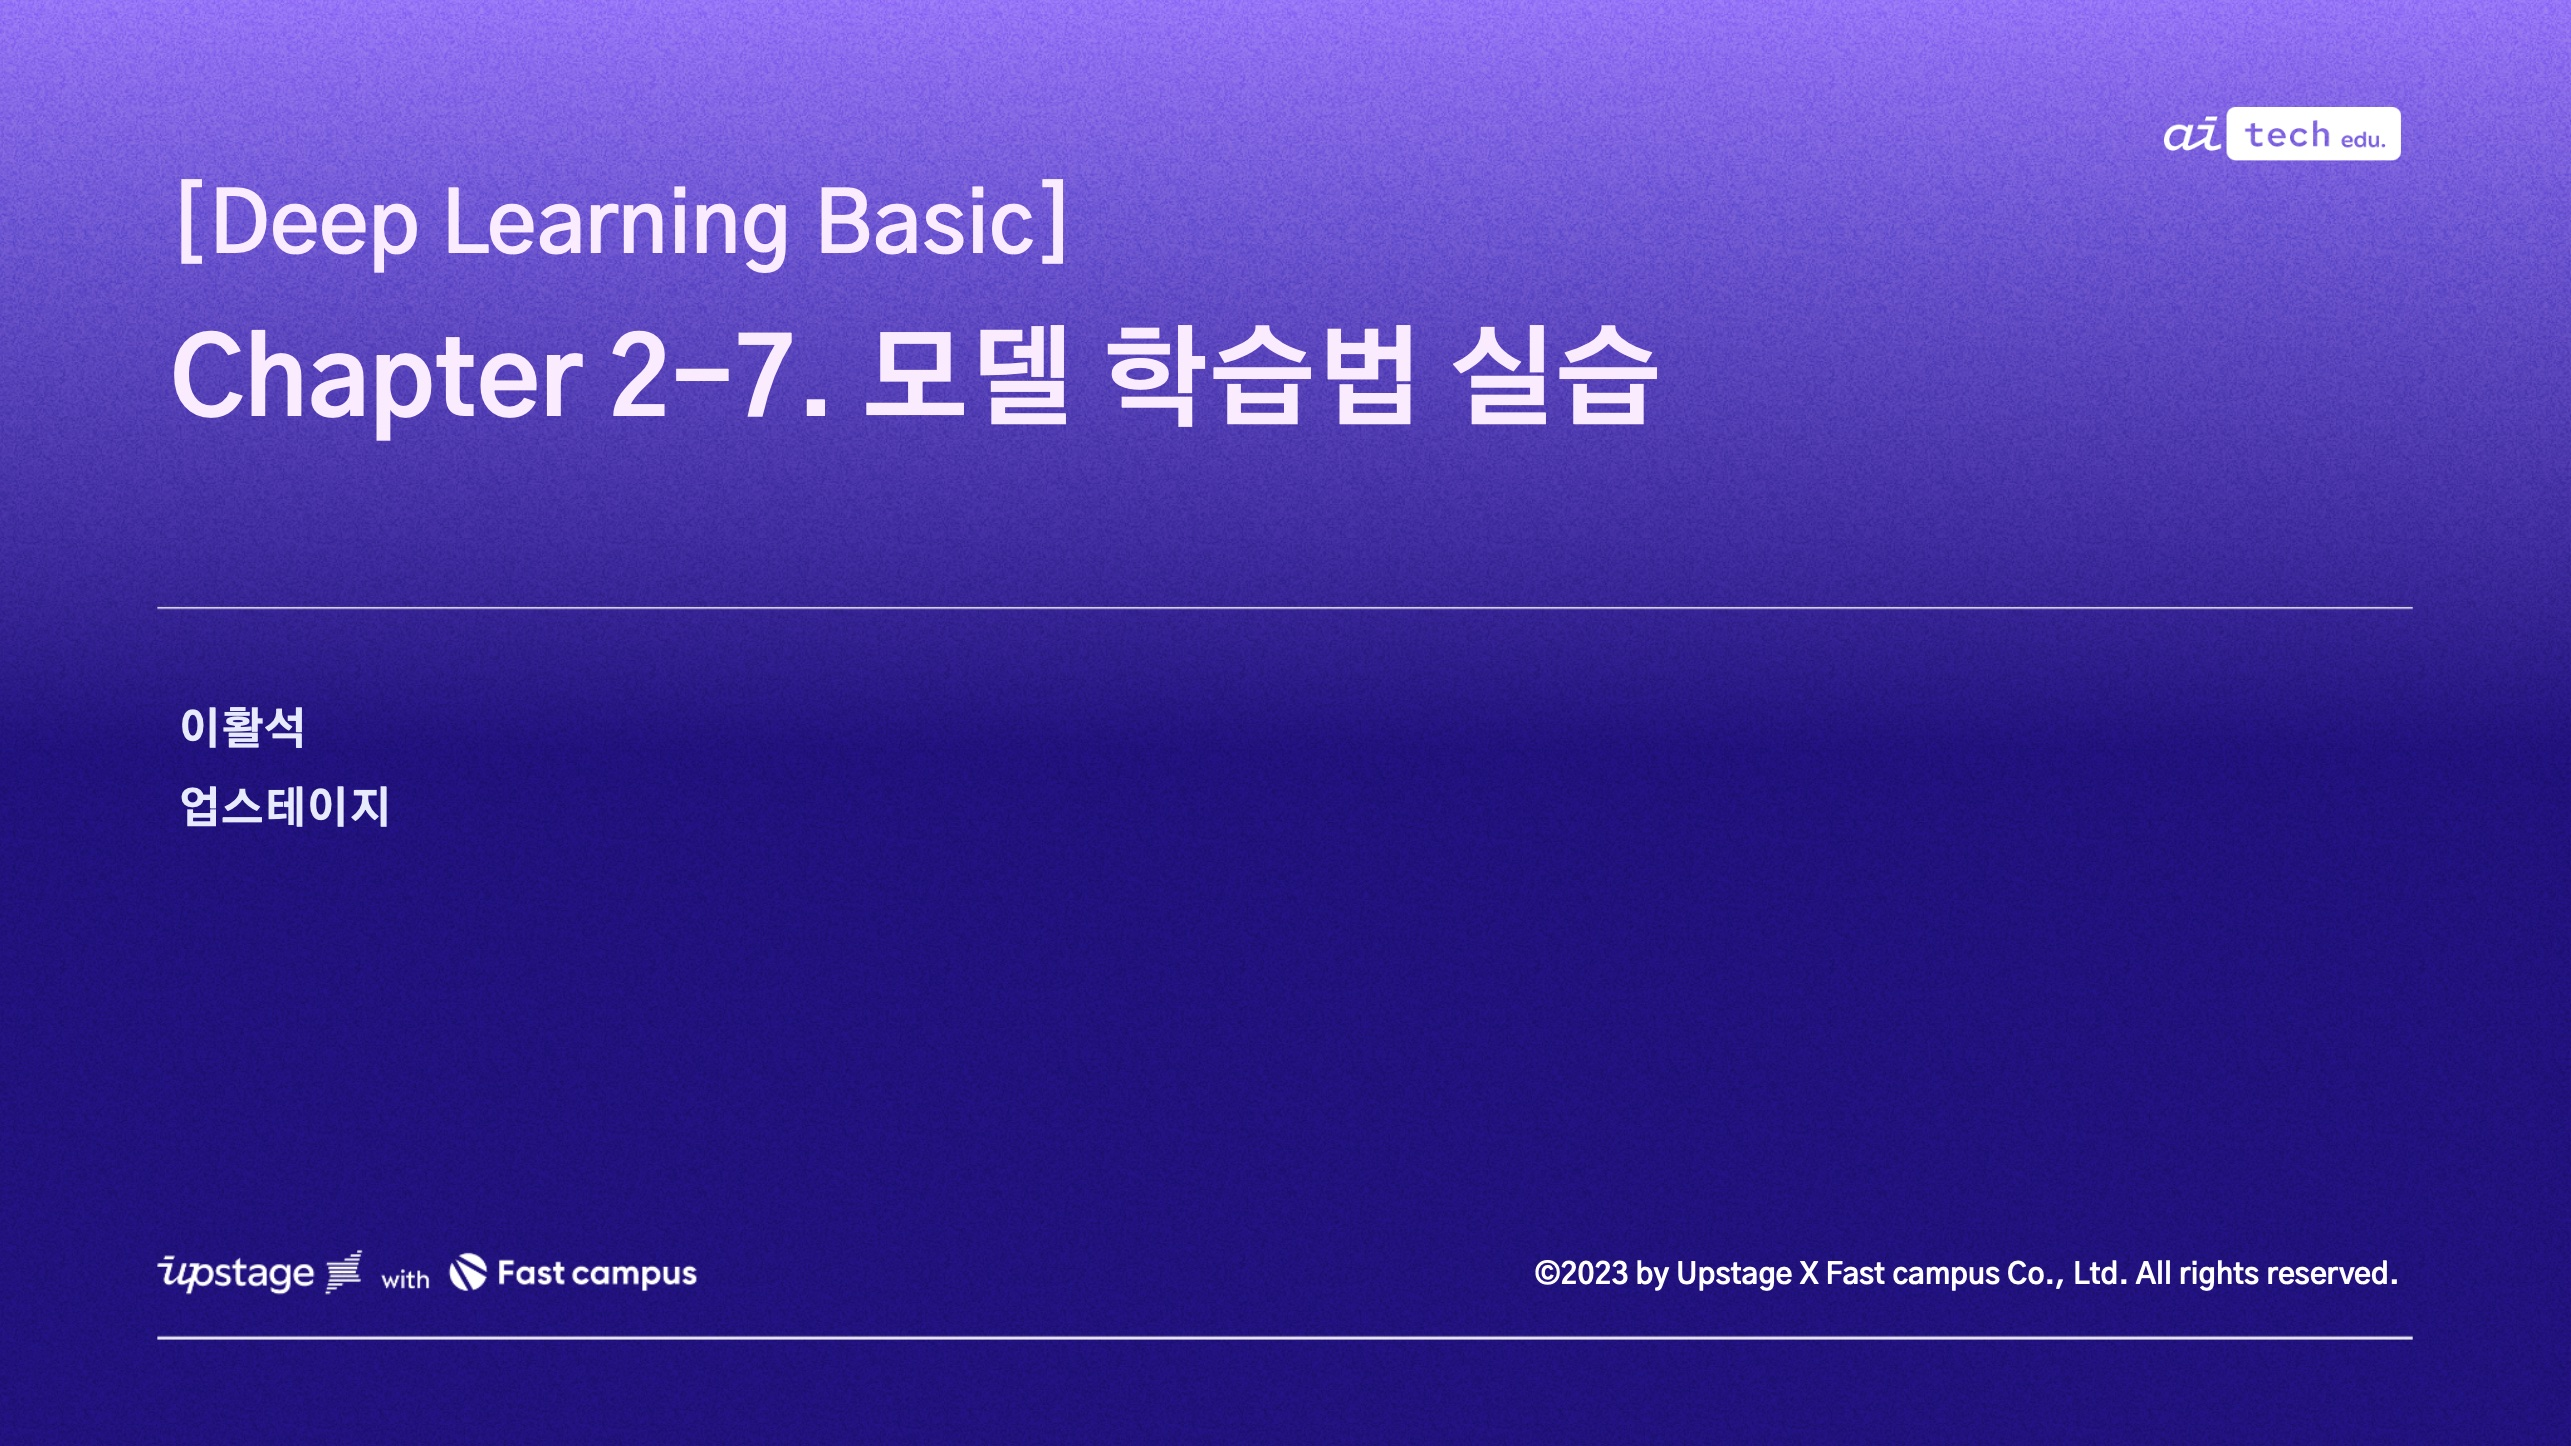

# (실습-1) 모델 학습법 실습

## 실습 개요

1) 실습 목적

&ensp;&ensp;본 실습은 [Chapter 2]에서 배운 개념들을 토대로 **가장 기본적인 딥러닝 파이프라인을 처음부터 끝까지 구현**하는 것을 목적으로 합니다. <br>
&ensp;&ensp;2-1강에서 배운 <u>다층 퍼셉트론(Multi-Layer Perceptron, MLP)</u>의 파라미터들이
2-2강에서 배운 <u>확률적 경사 하강법(Stochastic Gradient Descent, SGD)</u>과
2-3강에서 배운 <u>평균제곱오차(Mean Squared Error, MSE) 내지는 교차엔트로피(Cross Entropy, CE)</u>를 통해 어떻게 학습이 되는지 직접 구현해봄으로써 **딥러닝의 필수 요소인 '모델'이 '최적화 알고리즘'을 통해 '손실 함수'를 최소화하는 방향으로 학습되는 과정에 대한 이해**를 돕습니다.

<br>

2) 수강 목표

- MLP를 모델로, MSE 또는 CE를 손실 함수로, SGD를 최적화 알고리즘으로 한 딥러닝 파이프라인을 처음부터 끝까지 NumPy를 통해 구현할 수 있다.
- MLP를 구성하는 weight, bias, activation function에 대해 이해한 바를 하나의 클래스로 구현하여, MNIST Dataset의 형태에 맞게 적용할 수 있다.
- MSE와 CE의 수식을 파이썬으로 구현하여, MNIST 데이터셋에 대해 두 손실 함수의 학습 결과가 어떻게 다르게 나타나는지 이해할 수 있다.
- SGD 및 역전파 알고리즘에 대해 이해를 바탕으로 MLP 모델의 파라미터를 업데이트하는 과정을 밑바닥부터 구현할 수 있다.


### 실습 목차

- 1. MNIST 데이터셋 불러오기
  - 1-1. MNIST 데이터셋 다운로드 및 압축 해제
  - 1-2. MNIST 데이터셋 전처리

- 2. 간단한 MLP 모델 구성하기
  - 2-1. 활성화 함수의 구현
  - 2-2. MLP 레이어의 구현
  - 2-3. 손실 함수의 구현
  - 2-4. MLP 모델의 구현

- 3. 모델 학습하기
  - 3-1. 모델 학습 전 준비
  - 3-2. 모델 학습하기
- 4. 결과 시각화하기
  - 4-1. 학습 곡선 시각화
  - 4-2. 일부 데이터 시각화

### 실습 구성
> 앞으로 여러분들이 마주하게 될 실습코드는 다음과 같이 3개의 종류로 구성되어 있습니다.

- 📝 <font color='orange'><b>[ 설명 ]</b></font> : 코드를 작성하기 전 필요한 지식
- 👨‍💻 <font color='green'><b>[ 코드 ]</b></font>  : 본격적인 코드 작성
- 📚 <font color='blue'><b>[ 자료 ]</b></font>  : 코드와 관련한 읽을거리


> Chapter 2와 Chapter 3의 실습은 본질적으로 동일한 구성을 가지고 있습니다.
>
> 다만, 본 실습은 딥러닝 파이프라인의 네 가지 필수 요소를 코딩할 줄 아는 것이 주 목적이므로
> <br><font color="#8b71ff"><b>나머지 부분들은 Chapter 3보다 단순하게 작성</b></font>되어 있다는 점을 참고하시기 바랍니다.

### 데이터셋 개요

<div align="center">
<img src="https://upload.wikimedia.org/wikipedia/commons/f/f7/MnistExamplesModified.png" alt="MNIST Test Data Samples">
</div>


* 데이터셋 :
MNIST(Modified National Institute of Standards and Technology) Database

* 데이터셋 개요 :
<br>&ensp;&ensp;MNIST 데이터셋은 미국의 NIST에서 이미지 처리 시스템을 위해 모은 손글씨 이미지 데이터셋 NIST Special Database 3 중 일부를 재구성한 것으로, 0부터 9까지의 숫자 이미지와 이에 대응되는 숫자가 한 쌍으로 구성되어 있습니다. 이 데이터셋은 머신러닝 및 딥러닝 분야에서 가장 잘 알려진 벤치마크 데이터셋 중 하나로, 특히 딥러닝 기초 관련 교보재에 주로 활용되고 있습니다.

  - 데이터셋 구성
    - 입력(이미지) : 0부터 9까지의 숫자 중 하나에 속하는 28px * 28px의 흑백 이미지
    - 출력(숫자) : 주어진 이미지에 대응되는 숫자 (0~9)
  - 데이터 샘플 수
    - 학습 데이터&ensp;&ensp;: 60,000 개
    - 테스트 데이터&thinsp;: 10,000 개

* 데이터셋 저작권: [CC BY-SA 3.0](https://creativecommons.org/licenses/by-sa/3.0/)



### 환경 설정

해당 실습에서 필요한 패키지 정보는 아래와 같습니다.

colab에서 제공하는 최신 버전의 `numpy` 및 `matplotlib`를 사용하도록 하겠습니다.

`numpy`, `matplotlib` 외의 라이브러리 버전은 최하단의 **Package**를 참고하시기 바랍니다.
```
numpy >= 1.23.5
matplotlib >= 3.7.1
```


In [1]:
### 모델 학습 및 결과 시각화 필요한 라이브러리
# numpy : 행렬 연산에 필요한 라이브러리. MNIST 데이터를 불러오고, 모델을 학습시키는데 사용.
# matplotlib : 대표적인 시각화 라이브러리. 학습 결과를 시각화하는데 사용.
# tqdm : for문의 진행 상태를 표시하는데 사용하는 라이브러리. 학습 시간 및 진행 상태를 확인하는데 사용.
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

### 각종 유틸리티 라이브러리
# os : 파일 경로를 확인하는데 사용하는 라이브러리.
# random : 데이터를 랜덤하게 섞는데 사용하는 라이브러리.
# platform : 현재 사용하는 운영체제를 확인하는데 사용하는 라이브러리.
# warnings : 경고 메시지를 무시하거나 숨기는데 사용하는 라이브러리.
import os
import random
import platform
import warnings

### MNIST 데이터셋을 불러오는 데에 사용하는 라이브러리
# gzip : 압축된 파일을 읽는데 사용하는 라이브러리.
# urlretrieve : url로부터 데이터를 다운로드하는데 사용하는 라이브러리.
import gzip
from urllib.request import urlretrieve

In [2]:
# 재현성을 위한 시드 고정
SEED = 0
random.seed(SEED)
np.random.seed(SEED)
os.environ["PYTHONHASHSEED"] = str(SEED)

In [3]:
# 현재 OS 및 파이썬 버전 확인
current_os = platform.system()
print(f"Current OS: {current_os}")
print(f"Python Version: {platform.python_version()}")

Current OS: Linux
Python Version: 3.10.12


In [4]:
# 라이브러리 버전 확인
from importlib.metadata import version
print("numpy version : {}".format(version("numpy")))
print("matplotlib version : {}".format(version("matplotlib")))

numpy version : 2.0.0
matplotlib version : 3.9.0


In [5]:
# 중요하지 않은 에러 무시
warnings.filterwarnings(action='ignore')

In [6]:
# matplotlib의 해상도 높이기
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

---

## 1. MNIST 데이터셋 불러오기

```
💡 목차 개요 : 딥러닝 모델에 사용할 데이터셋을 외부에서 다운받아 numpy.ndarray로 변환하고 전처리하는 과정을 습득합니다.
```

> <font color='#8b71ff'>(참고) Chapter 3 실습에서는 최종 데이터셋을 pickle 파일로 변환하여 data 폴더에 저장하고 재사용하는 과정까지 구현되어 있습니다.</font>

- 1-1. MNIST 데이터셋 다운로드 및 압축 해제
- 1-2. MNIST 데이터셋 전처리

### 1-1. MNIST 데이터셋 다운로드 및 압축 해제

> MNIST 데이터셋은 딥러닝의 기초를 배울 시 가장 흔하게 접하는 데이터셋인 만큼 다양한 방법을 통해 코드에 불러올 수 있습니다.
>
> MNIST 데이터셋을 사용하는 방법은 크게 두 가지로, 하나는 직접 다운받아 가공하는 방법이며 다른 하나는 MNIST 등의 각종 데이터셋을 포함한 라이브러리를 통해 불러오는 방법이 있습니다.
>
> 본 실습에서는 이 중 직접 다운받아 가공하는 방법을 사용하도록 하겠습니다.


- 👨‍💻 <font color='green'><b>[ 코드 ]</b></font> MNIST 데이터셋 다운로드 및 압축 해제

#### 👨‍💻 <font color='green'><b>[ 코드 ]</b></font> MNIST 데이터셋 다운로드 및 압축 해제

Google Drive에서 Mount하실 경우, 아래의 코드를 참고하시길 바랍니다.
```python
from google.colab import drive
drive.mount('/content/drive')
```
> <font color='#8b71ff'>(참고) Chapter 3 실습에서는 구글 드라이브를 마운트하는 코드가 작성되어 있습니다.</font>



In [7]:
# MNIST를 다운받을 경로
url = 'http://yann.lecun.com/exdb/mnist/'

# MNIST를 저장할 디렉토리 (colab 사용 시, 기본 디렉토리는 `/content`)
# 만일 구글 드라이브를 마운트해서 사용할 경우, 사용하고자 하는 드라이브 위치를 `os.getcwd()` 부분에 덮어씌워 작성
dataset_dir = os.path.join(os.getcwd(), 'data')

# MNIST 데이터셋의 파일명 (딕셔너리)
key_file = {
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}

# 해당 경로가 없을 시 디렉토리 새로 생성
os.makedirs(dataset_dir, exist_ok=True)

# 해당 경로에 존재하지 않는 파일을 모두 다운로드
for filename in key_file.values():
    if filename not in os.listdir(dataset_dir):
        urlretrieve(url + filename, os.path.join(dataset_dir, filename))
        print("Downloaded %s to %s" % (filename, dataset_dir))

HTTPError: HTTP Error 403: Forbidden

In [8]:
import torch
from torchvision import datasets, transforms

# 데이터 변환
transform = transforms.Compose([transforms.ToTensor()])

# MNIST 데이터셋 다운로드 및 로드
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

print(f"Number of training samples: {len(train_loader.dataset)}")
print(f"Number of test samples: {len(test_loader.dataset)}")

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:04<00:00, 2388779.24it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 145085.02it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:06<00:00, 242440.20it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3737596.38it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Number of training samples: 60000
Number of test samples: 10000


### 1-2. MNIST 데이터셋 전처리

> 다운로드 받은 MNIST 데이터셋의 이미지 및 라벨은 그대로 사용할 수 없습니다.
>
>`numpy`에서의 사용이 가능하도록 모두 `numpy.ndarray`의 인스턴스로 변환하여 행렬 형태로 표현해줍니다.
>
> 나아가, MLP 모델 학습에 사용할 수 있도록 이미지와 라벨 각각 그에 맞는 전처리(preprocessing)를 수행할 것입니다.

-  👨‍💻 <font color='green'><b>[ 코드 ]</b></font> 이미지 데이터의 전처리
-  👨‍💻 <font color='green'><b>[ 코드 ]</b></font> 라벨 데이터의 전처리
-  👨‍💻 <font color='green'><b>[ 코드 ]</b></font> 최종 데이터셋 확인



#### 👨‍💻 <font color='green'><b>[ 코드 ]</b></font> 이미지 데이터의 전처리

- `(n,28,28)`이 아닌 `(n,784)` 크기가 되도록 변환
- 기존에 0에서 255 사이의 정수로 표현되던 흑백 이미지의 픽셀 값을 0과 1 사이의 실수값이 되도록 정규화

In [11]:
def _images(path):
    '''
    MNIST 데이터셋 이미지을 NumPy Array로 변환하여 불러오기
    '''
    # gzip 파일을 열고, 이미지를 읽어서 1차원 배열로 변환
    with gzip.open(path) as f:
        # 첫 16 바이트는 magic_number, n_imgs, n_rows, n_cols 의 정보이므로 무시
        pixels = np.frombuffer(f.read(), 'B', offset=16)

    # 28*28=784 이므로 784차원으로 reshape해준 뒤, 0~255의 값을 0~1로 정규화
    return pixels.reshape(-1, 28*28).astype('float32') / 255


In [12]:
# _images 함수를 이용하여 다운받은 학습/테스트 이미지를 numpy 행렬로 변환 및 전처리
X_train = _images(os.path.join(dataset_dir, key_file['train_img']))
X_test = _images(os.path.join(dataset_dir, key_file['test_img']))

#### 👨‍💻 <font color='green'><b>[ 코드 ]</b></font> 라벨 데이터의 전처리
- one-hot encoding 수행
  - 예시)
  <br>`2` -> `[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]`
  <br>`7` -> `[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]`

In [13]:
def _onehot(integer_labels):
    '''
    라벨 데이터를 one-hot encoding 하기
    '''
    n_rows = len(integer_labels)        # 라벨 데이터의 길이
    n_cols = integer_labels.max() + 1   # 라벨 데이터의 최댓값 + 1

    # 0으로 채워진 (n_rows, n_cols) 크기의 행렬 생성
    onehot = np.zeros((n_rows, n_cols), dtype='uint8')
    # one-hot 행렬의 각 행에 해당하는 라벨을 1로 변경
    onehot[np.arange(n_rows), integer_labels] = 1

    return onehot

def _labels(path):
    '''
    MNIST 데이터셋 라벨을 NumPy Array로 변환하여 불러오기
    '''
    # gzip 파일을 열고, 라벨 데이터를 불러온 뒤, integer로 변환
    with gzip.open(path) as f:
        # 첫 8 바이트는 magic_number, n_labels 의 정보이므로 무시
        integer_labels = np.frombuffer(f.read(), 'B', offset=8)

    # one-hot 인코딩한 결과를 반환
    return _onehot(integer_labels)

In [14]:
# _labels 함수를 이용하여 다운받은 학습/테스트 라벨을 numpy 행렬로 변환 및 전처리
y_train = _labels(os.path.join(dataset_dir, key_file['train_label']))
y_test = _labels(os.path.join(dataset_dir, key_file['test_label']))

#### 👨‍💻 <font color='green'><b>[ 코드 ]</b></font> 최종 데이터셋 확인

- 일반적인 딥러닝 파이프라인에서는 학습 데이터를 다시 둘로 쪼개어 검증 데이터를 확보해야 하지만,
<br>이번 실습에서는 검증 데이터가 크게 필요하지 않으므로 해당 과정을 생략합니다.

> <font color='#8b71ff'>(참고) Chapter 3 실습에는 데이터셋을 분할하는 과정이 포함되어 있습니다.</font>

In [15]:
# 최종 데이터셋의 형태 확인
print('X_train의 형태 : {}'.format(X_train.shape))
print('y_train의 형태 : {}'.format(y_train.shape))
print('X_test의 형태  : {}'.format(X_test.shape))
print('y_test의 형태  : {}'.format(y_test.shape))

X_train의 형태 : (60000, 784)
y_train의 형태 : (60000, 10)
X_test의 형태  : (10000, 784)
y_test의 형태  : (10000, 10)


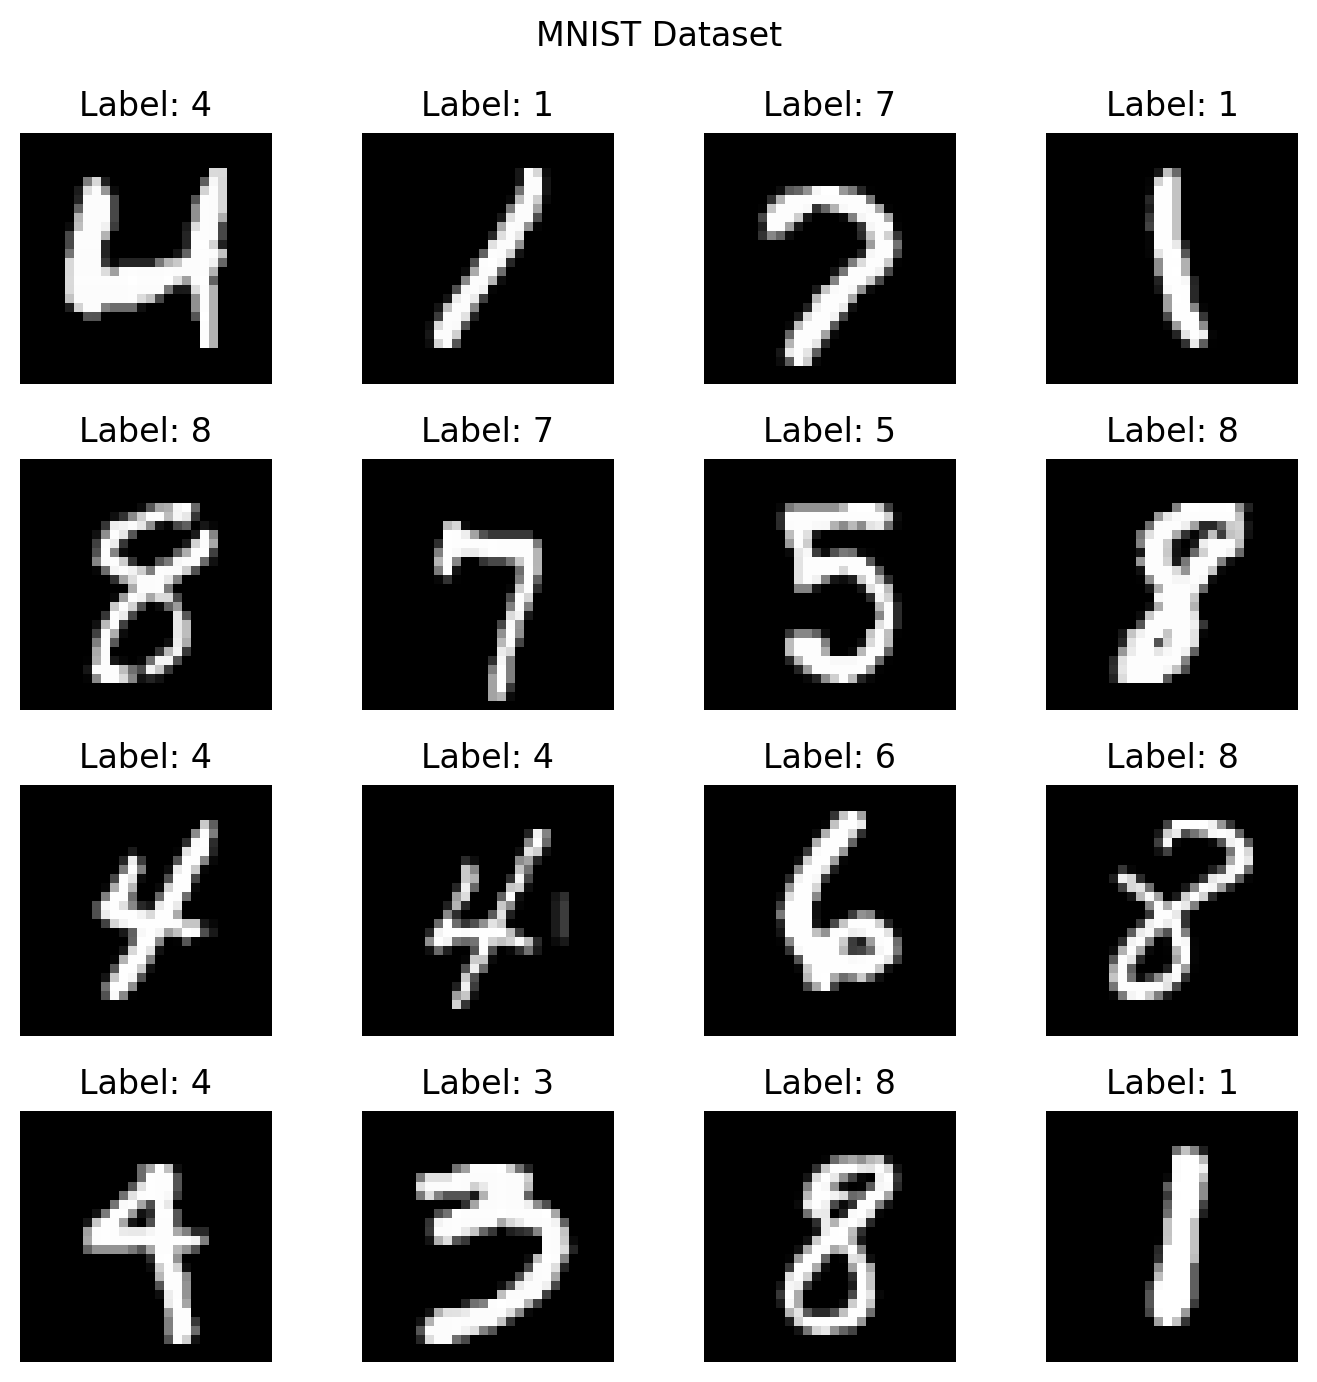

In [16]:
# 학습 데이터 내의 임의의 16개 샘플 살펴보기

# 7x7 사이즈의 새로운 figure 생성
plt.figure(figsize=(7,7))
# 16개의 랜덤한 정수 생성
random_indices = np.random.randint(0, len(X_train), size=16)

# 16개의 랜덤한 정수에 해당하는 이미지를 4x4 그리드에 하나씩 출력
for n, idx in enumerate(random_indices, start=1):
    # 4x4 그리드의 n번째 위치를 지정
    # 해당 위치에 그레이스케일 이미지를 출력하고, 타이틀로는 라벨 값을 출력
    # x축과 y축이 필요하지 않으므로 눈금 출력 생략
    plt.subplot(4,4,n)
    plt.imshow(X_train[idx].reshape(28,28), cmap='gray')
    plt.title(f"Label: {y_train[idx].argmax()}")
    plt.axis('off')

plt.suptitle('MNIST Dataset')
plt.tight_layout()
plt.show()

---

## 2. 간단한 MLP 모델 구성하기

```
💡 목차 개요 : numpy 라이브러리만으로 다층 퍼셉트론(MLP)을 구현하는 방법을 습득합니다.
```
<br>


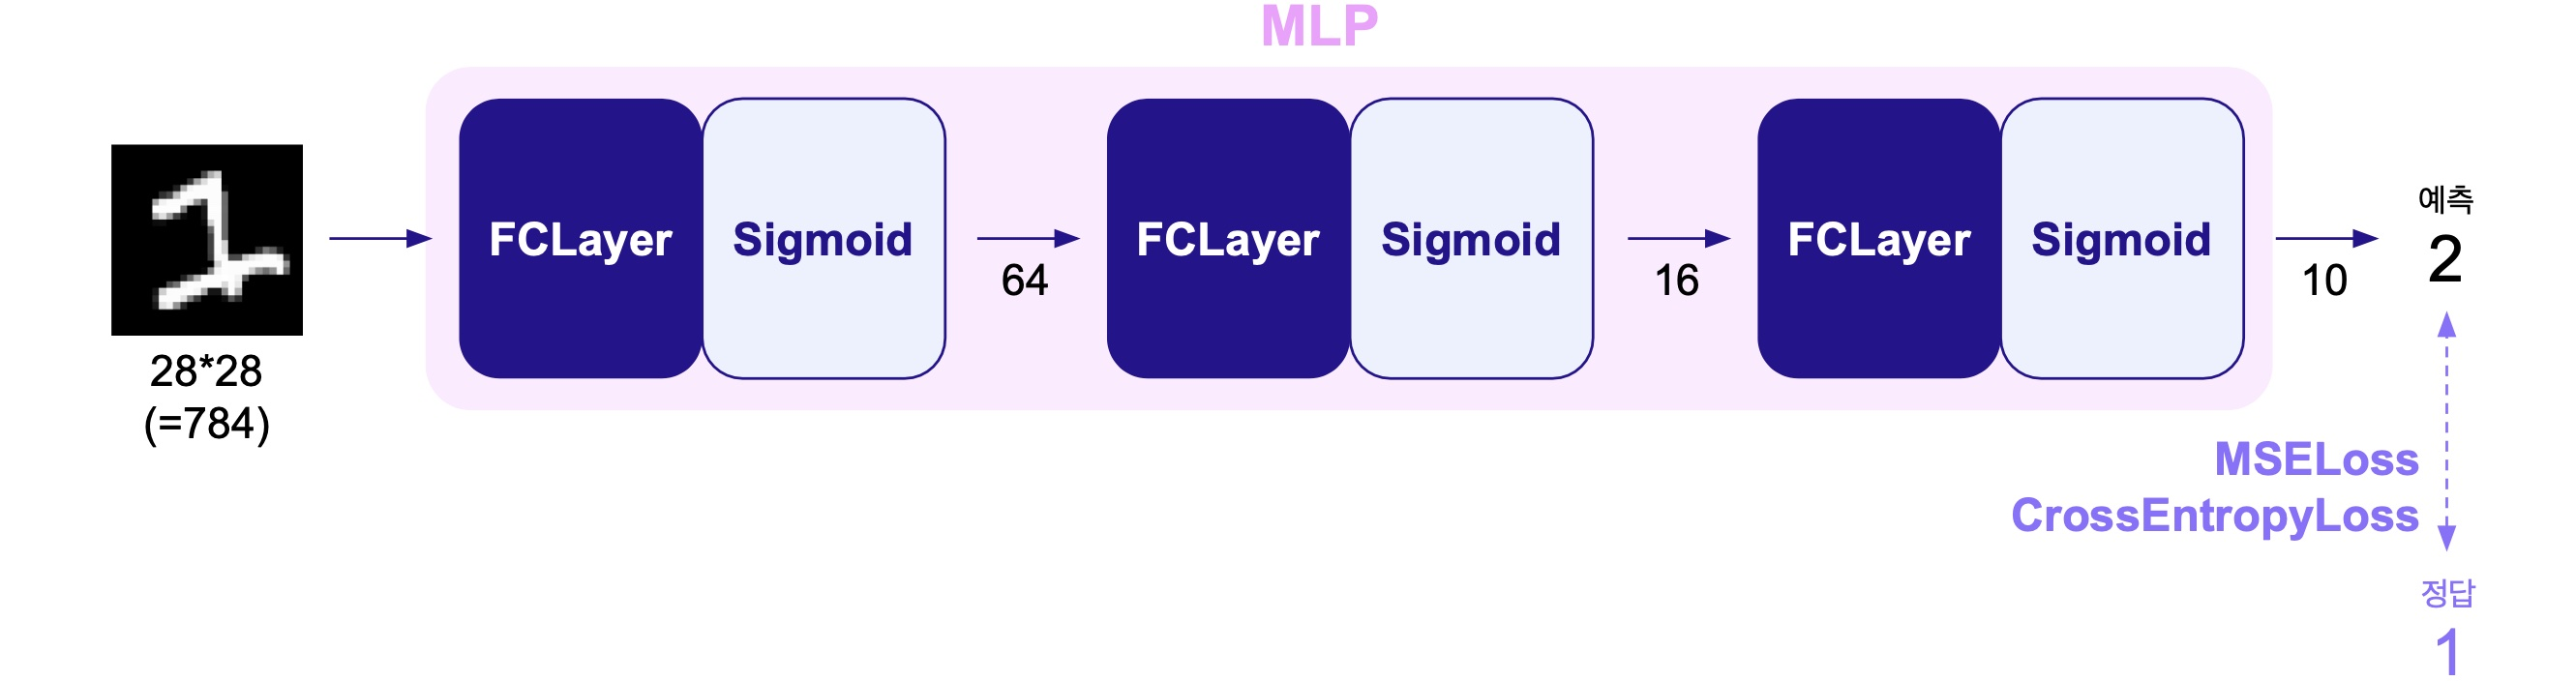
- 2-1. 활성화 함수의 구현 ... `Sigmoid`
- 2-2. MLP 레이어의 구현 ... `FCLayer`
- 2-3. 손실 함수의 구현 ... `MSELoss`, `CrossEntropyLoss`
- 2-4. MLP 모델의 구현 ... `MLP`

### 2-1. 활성화 함수의 구현

> 전체 모델을 구성하기에 앞서 여러 구성요소들이 필요한데, 그 중 가장 중요한 부분이 활성화 함수(activation function)입니다.
>
> 각각의 구성요소들을 구현할 때에는 필연적으로 학습을 위한 도함수(내지는 그래디언트)도 함께 정의되어야 합니다.
>
> 본 단락에서는 **2-1강**을 통해 배운 시그모이드 함수를 클래스의 형태로 구현합니다.

- 📝 <font color='orange'><b>[ 설명 ]</b></font> 시그모이드 함수 및 도함수의 수식
- 👨‍💻 <font color='green'><b>[ 코드 ]</b></font> 시그모이드 함수의 구현
- 👨‍💻 <font color='green'><b>[ 코드 ]</b></font> 시그모이드 레이어의 구현
- 👨‍💻 <font color='green'><b>[ 코드 ]</b></font> 시그모이드 레이어 테스트하기

#### 📝 <font color='orange'><b>[ 설명 ]</b></font> 시그모이드 함수 및 도함수의 수식

$$ f = \frac{1}{1 + e^{-x}}$$

$$ \frac{\partial f}{\partial x} = \left(1.0 - f(x) \right) f(x) $$


#### 👨‍💻 <font color='green'><b>[ 코드 ]</b></font> 시그모이드 함수의 구현


In [17]:
def sigmoid(x):
    '''시그모이드 함수'''
    return 1 / (1 + np.exp(-x))

In [18]:
def sigmoid_prime(x):
    '''시그모이드 함수의 그래디언트'''
    return (1.0 - sigmoid(x)) * sigmoid(x)

#### 👨‍💻 <font color='green'><b>[ 코드 ]</b></font> 시그모이드 레이어의 구현


In [19]:
class Sigmoid():
    '''시그모이드 레이어 (시그모이드 함수의 클래스 버전)'''
    def __init__(self):
        self.out = None

    def forward(self, x):
        '''시그모이드 레이어의 순전파(forward propagation)'''
        # 순전파가 흐를 시 그 결과물을 attribute로 저장 및 리턴
        self.out = sigmoid(x)
        return self.out

    def backward(self, dout):
        '''시그모이드 레이어의 역전파(backpropagation)'''
        # 역전파가 흐를시 그 그래디언트 값을 리턴
        dx = dout * (1.0 - self.out) * self.out
        return dx

#### 👨‍💻 <font color='green'><b>[ 코드 ]</b></font> 시그모이드 레이어 테스트하기


In [20]:
# 시그모이드 레이어의 순전파/역전파가 잘 작동하는지 테스트
# 임의의 사이즈에 대해 모두 동일한 크기의 결과가 출력되어야 하며, 각각 단순하게 시그모이드 함수를 적용한 값과 도함수를 적용한 값이 된다면 성공

x = np.random.randn(5, 2)
print('x =\n', x)

sigmoid_layer = Sigmoid()
print('\nsigmoid_layer.forward(x) =\n', sigmoid_layer.forward(x))
print('\nsigmoid_layer.backward(1) =\n', sigmoid_layer.backward(1)) # 최종 출력물의 미분값이 1일 경우 역전파의 결과

x =
 [[-0.10321885  0.4105985 ]
 [ 0.14404357  1.45427351]
 [ 0.76103773  0.12167502]
 [ 0.44386323  0.33367433]
 [ 1.49407907 -0.20515826]]

sigmoid_layer.forward(x) =
 [[0.47421817 0.60123138]
 [0.53594876 0.81065526]
 [0.68157899 0.53038128]
 [0.60917918 0.58265313]
 [0.81668973 0.44888958]]

sigmoid_layer.backward(1) =
 [[0.2493353  0.23975221]
 [0.24870769 0.15349331]
 [0.21702907 0.24907698]
 [0.23807991 0.24316846]
 [0.14970761 0.24738772]]


### 2-2. MLP 레이어의 구현

> 신경망을 구성하게 될 각각의 MLP 레이어를 클래스 형태로 구현합니다.
> <br>MLP 모델을 구성하는 레이어는 fully-connected layer, linear layer, dense layer 등의 다양한 이름으로 불리고 있습니다.
> <br>본 실습에서는 `FCLayer`라는 이름으로 클래스를 정의하도록 하겠습니다.

- 👨‍💻 <font color='green'><b>[ 코드 ]</b></font> `FCLayer` 클래스 구현하기
- 👨‍💻 <font color='green'><b>[ 코드 ]</b></font>  `FCLayer` 클래스 테스트하기

#### 👨‍💻 <font color='green'><b>[ 코드 ]</b></font> `FCLayer` 클래스 구현하기


In [21]:
class FCLayer():
    '''완전 연결 레이어 (Fully-Connected Layer, FC Layer)'''
    def __init__(self, input_size, output_size, weight_init_std=0.01):
        '''가중치와 편향 초기화
        input_size: 입력 데이터의 차원 수
        output_size: 출력 데이터의 차원 수
        weight_init_std: 가중치 초기화 시 사용하는 표준 편차'''
        # 가중치는 정규분포를 따르는 난수로 초기화
        self.W = np.random.randn(input_size, output_size)
        # 편향도 정규분포를 따르는 난수로 초기화
        self.b = np.random.randn(output_size)

        # 역전파 계산을 위해 입력 데이터 저장
        self.x = None
        # 모델 학습을 위해 가중치와 편향의 그래디언트 저장
        self.dW = None
        self.db = None


    def forward(self, x):
        '''완전 연결 레이어의 순방향 전파(forward propagation)'''
        # 역전파 계산을 위해 입력 데이터 저장
        self.x = x
        # y = Wx + b
        out = np.dot(x, self.W) + self.b

        return out

    def backward(self, dout):
        '''완전 연결 레이어의 역방향 전파(backward propagation; 역전파)'''
        # dy/dx = W  ->  dx = dy * W
        dx = np.dot(dout, self.W.T)
        # dy/dW = x  ->  dW = x * dy
        self.dW = np.dot(self.x.T, dout)
        # dy/db = 1  ->  db = dy * 1
        self.db = np.sum(dout, axis=0)

        return dx

#### 👨‍💻 <font color='green'><b>[ 코드 ]</b></font> `FCLayer` 클래스 테스트하기

- 임의로 생성한 변수를 이용하여, 구현한 레이어가 문제 없이 실행되는지 확인해보는 작업을 해봅시다.

In [22]:
# FCLayer 레이어가 임의의 입출력 데이터에 대해 잘 작동하는지 테스트

x = np.random.randn(5, 2)
y = np.random.randn(5, 3)
print('x =\n', x)

fc_layer = FCLayer(2, 3)
print('\nfc_layer.forward(x) =\n', fc_layer.forward(x))
print('\nfc_layer.backward(y) =\n', fc_layer.backward(y))

x =
 [[ 0.3130677  -0.85409574]
 [-2.55298982  0.6536186 ]
 [ 0.8644362  -0.74216502]
 [ 2.26975462 -1.45436567]
 [ 0.04575852 -0.18718385]]

fc_layer.forward(x) =
 [[ 1.46799167 -1.7190734   1.62817886]
 [-6.01190034  0.91385242  0.45042808]
 [ 2.40336148 -1.9130545   1.20599374]
 [ 6.03706376 -3.18300724  1.73977896]
 [ 0.11102737 -1.06432113  0.66895248]]

fc_layer.backward(y) =
 [[ 2.17336759 -1.02791573]
 [ 2.05790811  2.03279805]
 [-1.29734078 -1.42814094]
 [ 2.67540605 -1.319593  ]
 [-0.57430296  2.96331783]]


### 2-3. 손실 함수의 구현

> 신경망의 마지막 레이어에서 나온 결과물을 실제 y값과 비교할 손실 함수를 클래스의 형태로 구현합니다.
>
> 본 실습에서는 (2-3)강에서 배운 두 가지의 손실 함수, 평균제곱오차(MSE)와 교차엔트로피(Cross Entropy)를 구현합니다.

-  👨‍💻 <font color='orange'><b>[ 설명 ]</b></font> MSE 손실 함수 및 도함수의 수식
-  👨‍💻 <font color='green'><b>[ 코드 ]</b></font> MSE 손실 함수 구현하기
-  👨‍💻 <font color='orange'><b>[ 설명 ]</b></font> 교차엔트로피(CE) 손실 함수 및 도함수의 수식
-  👨‍💻 <font color='green'><b>[ 코드 ]</b></font> 교차엔트로피(CE) 손실 함수 구현하기


#### 📝 <font color='orange'><b>[ 설명 ]</b></font> MSE 손실 함수 및 도함수의 수식
$$
L_{MSE}(y,\hat{y}) = \frac{1}{n}\sum_{i=1}^n \left(y_i - \hat{y}_i \right)^2
$$

$$
\frac{dL}{d\hat y} = \frac{2}{n}\sum_{i=1}^n \left(\hat{y}_i - y\right)
$$

#### 👨‍💻 <font color='green'><b>[ 코드 ]</b></font> MSE 손실 함수 구현하기


In [23]:
class MSELoss():
    '''Mean Squared Error Loss'''
    def __init__(self):
        self.loss = None    # 손실 함수 값. 역전파 계산을 위해 인스턴스 내에 저장됨
        self.y = None       # 추론값 (y)
        self.t = None       # 실제값 (target)

    def forward(self, y, t):
        '''Forward Propagation of Mean Squared Error Loss'''
        # L = 1/N * sum((y - t)^2)
        self.y = y
        self.t = t
        self.loss = np.mean((t - y) ** 2)
        return self.loss

    def backward(self, dout=1):
        '''Backward Propagation (Backpropagation) of Mean Squared Error Loss'''
        # dL/dy = 2(y - t) / N  ->  dy = 2(y - t) / N
        dx = dout * (self.y - self.t) * 2 / self.t.shape[0]
        return dx

#### 📝 <font color='orange'><b>[ 설명 ]</b></font> 교차엔트로피(CE) 손실 함수 및 도함수의 수식
$$
L(y,\hat{y}) = \frac{-1}{n}\sum_{i=1}^n y_i\log(\hat{y}_i)+(1-y_i)(\log(1-\hat{y}_i)
$$

$$
\frac{dL}{d\hat y} = \frac{-1}{n}\left(\frac{y_i}{\hat{y}_i} - \frac{1-y_i}{1 - \hat{y}_i}\right) = \frac{\hat{y}_i-y_i}{n(1-\hat{y}_i)\hat{y}_i}
$$

#### 👨‍💻 <font color='green'><b>[ 코드 ]</b></font> 교차엔트로피(CE) 손실 함수 구현하기


In [24]:
class CrossEntropyLoss():
    '''교차 엔트로피(Cross Entropy) 레이어'''
    def __init__(self):
        self.loss = None
        self.y = None
        self.t = None

    def forward(self, y, t):
        '''교차 엔트로피 레이어의 순방향 전파'''
        # L = -1/N * sum(t * log(y) + (1 - t) * log(1 - y))
        self.y = y
        self.t = t
        self.loss = - np.sum(t * np.log(y + 1e-7) + (1 - t) * np.log(1 - y + 1e-7)) / len(y)
        return self.loss

    def backward(self, dout=1):
        '''교차 엔트로피 레이어의 역방향 전파'''
        # dL/dy = -t/y + (1 - t)/(1 - y)  ->  dy = (-t/y + (1 - t)/(1 - y))
        dx =  dout * (self.y - self.t) / (self.t.shape[0] * (1-self.y) * self.y + 1e-7)
        return dx

### 2-4. MLP 모델의 구현

> 앞서 만든 시그모이드 함수와 FC 레이어를 바탕으로 MLP 모델을 구성합니다.

-  👨‍💻 <font color='orange'><b>[ 설명 ]</b></font> MLP 모델의 구성
-  👨‍💻 <font color='green'><b>[ 코드 ]</b></font> MLP 모델의 구현
-  👨‍💻 <font color='green'><b>[ 코드 ]</b></font> MLP 모델 테스트하기

#### 📝 <font color='orange'><b>[ 설명 ]</b></font> MLP 모델의 구성

위에서 구현한 클래스들을 활용하여 최종적으로 MLP 모델 클래스를 구현합니다.

모델 내에서 사용할 인자는 아래와 같습니다.
- `input_size` : 입력 데이터의 차원 수
- `hidden_size_list` : 은닉층 차원 수의 리스트 (e.g. `[100, 100, 100]`)
- `output_size` : 출력 데이터의 차원 수
- `loss_type` : 손실 함수의 종류 (`'MSE'` 또는 `'CrossEntropy'`)

> <font color='#8b71ff'>(참고) Chapter 3 실습에는 성능 향상 알고리즘을 적용하기 위한 추가적인 인자들이 들어가 있습니다. <br>&ensp;&ensp;&ensp;&ensp;&ensp; e.g. `use_dropout`, `weight_decay_lambda`</font>

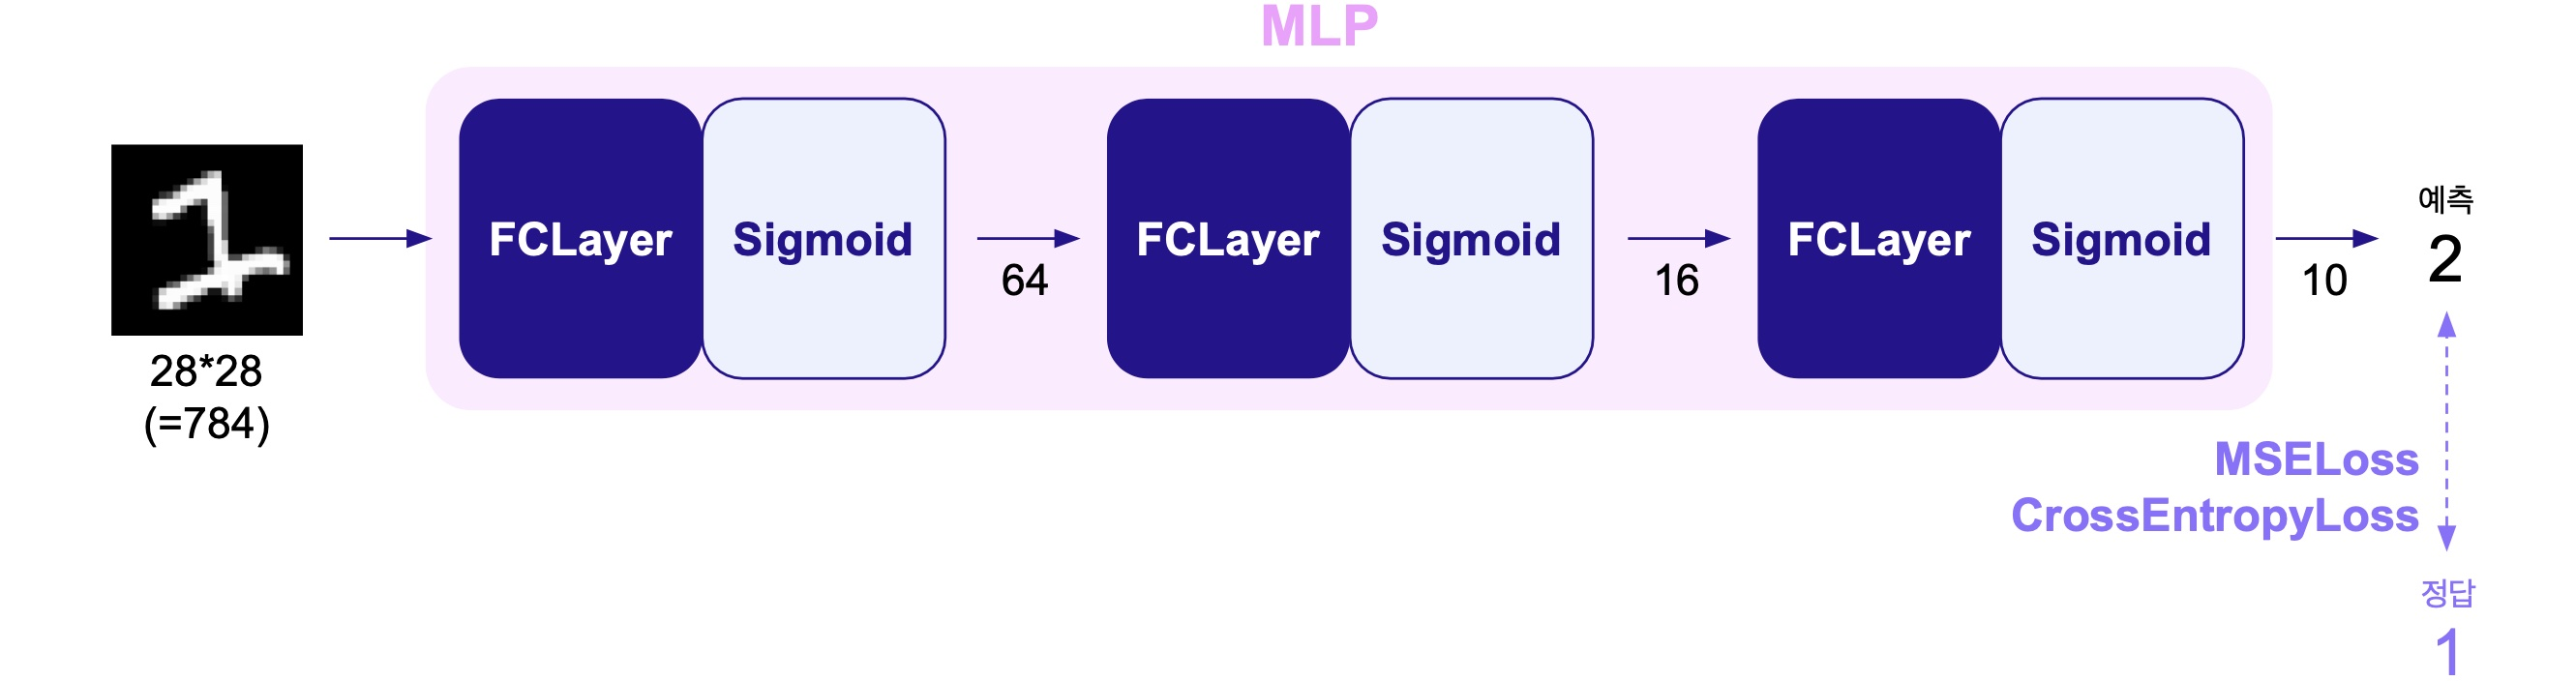

#### 👨‍💻 <font color='green'><b>[ 코드 ]</b></font> MLP 모델의 구현


In [25]:
class MLP():
    '''다층 퍼셉트론(Multi Layer Perceptron, MLP) 모델'''
    def __init__(self, input_size, hidden_size_list, output_size, loss_type='MSE'):
        '''신경망의 구조와 손실 함수 정의
        input_size: 입력 데이터의 차원 수
        hidden_size_list: 은닉층 차원 수의 리스트 (e.g. [100, 100, 100])
        output_size: 출력 데이터의 차원 수
        loss_type: 손실 함수의 종류 ('MSE' or 'CrossEntropy')
        '''

        self.input_size = input_size
        self.hidden_size_list = hidden_size_list
        self.output_size = output_size
        self.hidden_layer_num = len(hidden_size_list)
        self.loss_type = loss_type

        ### 레이어 쌓기 : FCLayer -> Sigmoid -> ... -> FCLayer -> Sigmoid
        # 입력층
        self.layers = [
            FCLayer(input_size, hidden_size_list[0]),
            Sigmoid()
        ]
        # 은닉층
        for idx in range(1, self.hidden_layer_num):
            self.layers.append(FCLayer(hidden_size_list[idx-1], hidden_size_list[idx]))
            self.layers.append(Sigmoid())
        # 출력층
        self.layers.append(FCLayer(hidden_size_list[-1], output_size))
        self.layers.append(Sigmoid())

        # 인자로 받은 `loss_type`에 맞게 손실 함수 레이어 정하기
        if self.loss_type == 'MSE':
            self.loss_layer = MSELoss()
        elif self.loss_type == 'CrossEntropy':
            self.loss_layer = CrossEntropyLoss()
        else:
            self.loss_layer = None


        self.loss = None

    def predict(self, x):
        '''입력값을 받았을 때 순방향 전파를 통한 출력물 산출(예측)'''
        for layer in self.layers:
            x = layer.forward(x)
        return x

    def forward(self, x, t):
        '''MLP 모델의 순방향 전파'''
        y = self.predict(x)
        self.loss = self.loss_layer.forward(y, t)
        return self.loss

    def backward(self, dout=1):
        '''MLP 모델의 역방향 전파'''
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

#### 👨‍💻 <font color='green'><b>[ 코드 ]</b></font> MLP 모델 테스트하기


In [26]:
# 임의의 입출력 데이터와 하이퍼파라미터에 대해 MLP 모델이 에러 없이 작동하는지 테스트

x = np.random.randn(5, 2)
y = np.random.randn(5, 1)
print('x =\n', x)

mlp = MLP(input_size=2, hidden_size_list=[10, 5], output_size=1, loss_type='MSE')
print('\nmlp.predict(x) =\n', mlp.predict(x))
print('\nmlp.forward(x, y) =\n', mlp.forward(x, y))
print('\nmlp.backward() =\n', mlp.backward())

x =
 [[-0.51080514 -1.18063218]
 [-0.02818223  0.42833187]
 [ 0.06651722  0.3024719 ]
 [-0.63432209 -0.36274117]
 [-0.67246045 -0.35955316]]

mlp.predict(x) =
 [[0.09179987]
 [0.0957102 ]
 [0.09523428]
 [0.09244939]
 [0.09246448]]

mlp.forward(x, y) =
 1.4714343261962757

mlp.backward() =
 [[-3.38789968e-04 -3.67465930e-04]
 [ 1.17086873e-03  3.64237844e-03]
 [-5.29701613e-05 -1.65101162e-04]
 [-3.87903857e-05  4.80263293e-04]
 [-1.30842487e-04  1.66334466e-03]]


---

## 3. 모델 학습하기

```
💡 목차 개요 : 모델을 선언하기 위한 하이퍼파라미터 세팅부터 SGD를 통해 모델을 학습하는 과정까지를 구현해봅니다.
```
- 3-1. 모델 학습 전 준비
- 3-2. 모델 학습하기

### 3-1. 모델 학습 전 준비

> 모델을 학습하기에 앞서 어떤 하이퍼파라미터가 세팅되어야 하는지, 이를 통해 어떻게 모델을 생성하며, 학습에 필요한 정확도 함수의 구현을 알아봅니다.

- 👨‍💻 <font color='green'><b>[ 코드 ]</b></font> 정확도 함수 정의하기
- 👨‍💻 <font color='green'><b>[ 코드 ]</b></font> 하이퍼파라미터 설정하기
- 👨‍💻 <font color='green'><b>[ 코드 ]</b></font> 모델 생성하기



#### 👨‍💻 <font color='green'><b>[ 코드 ]</b></font> 정확도 함수 정의하기

In [27]:
# one-hot 인코딩이 되어 있는 값을 다시 라벨로 바꾸어 비교
def accuracy(y, t):
    '''정확도 함수'''
    y = np.argmax(y, axis=1)
    t = np.argmax(t, axis=1)
    return np.sum(y == t) / float(len(t))

#### 👨‍💻 <font color='green'><b>[ 코드 ]</b></font> 하이퍼파라미터 설정하기

- 학습률(`learning_rate`) 설정
    - MSE 손실 함수는 vanishing gradient문제가 생길 수 있으므로 **CE보다 더 큰 값의 학습률을 설정**해주었다.
    - 즉 이전 강의에서 살펴본 바와 같이, 동일한 학습률을 사용한다면 CE의 학습이 MSE보다 훨씬 빠를 것이다.
    - MNIST 데이터셋의 경우 학습이 쉬운 데이터셋이기에 본 실습에서는 빠른 학습을 위해 큰 값으로 정하였으나, <br>**일반적으로 학습률은 소수점 단위(0.01 ~ 0.000001)로 설정되는 매우 작은 값**이다.

In [28]:
# 네트워크 구조를 정하기 위한 하이퍼파라미터 (784 -> 64 -> 16 -> 10)
n_input = 784
n_hidden = (64,16,)
n_output = 10

# 학습에 필요한 하이퍼파라미터
batch_size = 128
n_epochs = 30
print_every = 1
learning_rate_mse = 3
learning_rate_ce = 0.5

#### 👨‍💻 <font color='green'><b>[ 코드 ]</b></font> 모델 생성하기
- MSE와 CE의 결과를 비교하기 위해 두 개의 다른 모델을 생성

In [29]:
# MSE 손실 함수를 사용하는 MLP 모델
mlp_mse = MLP(n_input, n_hidden, n_output, loss_type='MSE')

# Cross Entropy 손실 함수를 사용하는 MLP 모델
mlp_ce = MLP(n_input, n_hidden, n_output, loss_type='CrossEntropy')

### 3-2. 모델 학습하기

> 3-2에서 만든 모델을 SGD 알고리즘을 통해 학습하는 과정을 구현합니다.

- 👨‍💻 <font color='green'><b>[ 코드 ]</b></font> 모델 학습하기

> <font color='#8b71ff'>(참고) Chapter 3 실습에서는 최적화 알고리즘에 해당하는 옵티마이저(Optimizer)와 <br>&ensp;&ensp;&ensp;&ensp;&ensp;&nbsp;학습 과정을 담은 트레이너(Trainer)가 모두 클래스 형태로 구현되어 있습니다.</font>



#### 👨‍💻 <font color='green'><b>[ 코드 ]</b></font> 모델 학습하기

In [30]:
def training(model, learning_rate, X_train, y_train, X_test, y_test):
    '''모델 학습 함수'''
    training_errors, training_accs = [], [] # 학습 손실 및 정확도
    test_errors, test_accs = [], []         # 테스트 손실 및 정확도

    # 학습 과정 : n_epochs만큼 반복
    for epoch in tqdm(range(n_epochs)):
        # 학습 데이터를 랜덤하게 섞음
        idx = np.random.permutation(X_train.shape[0])
        X_train = X_train[idx]
        y_train = y_train[idx]

        # 미니배치 학습
        for i in range(0, X_train.shape[0], batch_size):
            X_batch = X_train[i:i+batch_size]
            y_batch = y_train[i:i+batch_size]

            # 순전파
            model.forward(X_batch, y_batch)

            # 역전파
            model.backward()

            # 모델 파라미터 업데이트
            for layer in model.layers:
                if isinstance(layer, FCLayer):
                    layer.W -= learning_rate * layer.dW
                    layer.b -= learning_rate * layer.db

        # 학습 과정 출력 : print_every의 배수에 해당할 때마다 출력
        if (epoch+1) % print_every == 0:
            # 모든 학습 데이터에 대한 손실과 정확도 계산
            model.forward(X_train, y_train)
            training_errors.append(model.loss)
            training_accs.append(accuracy(model.predict(X_train), y_train))

            # 모든 테스트 데이터에 대한 손실과 정확도 계산
            model.forward(X_test, y_test)
            test_errors.append(model.loss)
            test_accs.append(accuracy(model.predict(X_test), y_test))

            # 학습 과정 출력
            print('[Epoch {}/{}] Training Loss = {:.4f} / Training Acc = {:.2f}% /'
                  'Test Loss = {:.4f} / Test Acc = {:.2f}%'.format(
                      epoch+1, n_epochs,
                      training_errors[-1], training_accs[-1]*100,
                      test_errors[-1], test_accs[-1]*100))

    return np.asarray([training_errors, test_errors, training_accs, test_accs])

In [31]:
# MSE 손실 함수를 사용하는 모델 학습
training_result_mse = training(mlp_mse, learning_rate_mse, X_train, y_train, X_test, y_test)

ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

In [ ]:
# Cross Entropy 손실 함수를 사용하는 모델 학습
training_result_ce = training(mlp_ce, learning_rate_ce, X_train, y_train, X_test, y_test)

  0%|          | 0/30 [00:00<?, ?it/s]

[Epoch 1/30] Training Loss = 1.5202 / Training Acc = 72.05% /Test Loss = 1.5090 / Test Acc = 72.36%
[Epoch 2/30] Training Loss = 1.0852 / Training Acc = 81.90% /Test Loss = 1.0692 / Test Acc = 82.11%
[Epoch 3/30] Training Loss = 0.8538 / Training Acc = 86.44% /Test Loss = 0.8441 / Test Acc = 86.42%
[Epoch 4/30] Training Loss = 0.7299 / Training Acc = 88.66% /Test Loss = 0.7298 / Test Acc = 88.62%
[Epoch 5/30] Training Loss = 0.6544 / Training Acc = 89.85% /Test Loss = 0.6638 / Test Acc = 89.73%
[Epoch 6/30] Training Loss = 0.5881 / Training Acc = 90.95% /Test Loss = 0.6067 / Test Acc = 90.64%
[Epoch 7/30] Training Loss = 0.5475 / Training Acc = 91.61% /Test Loss = 0.5667 / Test Acc = 91.44%
[Epoch 8/30] Training Loss = 0.5060 / Training Acc = 92.22% /Test Loss = 0.5360 / Test Acc = 91.90%
[Epoch 9/30] Training Loss = 0.4777 / Training Acc = 92.81% /Test Loss = 0.5059 / Test Acc = 92.35%
[Epoch 10/30] Training Loss = 0.4467 / Training Acc = 93.32% /Test Loss = 0.4839 / Test Acc = 92.59%

---

## 4. 결과 시각화하기

```
💡 목차 개요 : 학습하는 동안 생성된 데이터를 바탕으로 결과를 시각화해봅니다.
```
- 3-1. 학습 곡선 시각화
- 3-2. 일부 데이터 시각화

### 4-1. 학습 곡선 시각화

> 딥러닝 분야에서의 학습 곡선(Learning Curve)은 모델이 잘 학습되고 있는지를 각 epoch에 대해 선그래프로 도식화한 것을 의미합니다.

-  👨‍💻 <font color='green'><b>[ 코드 ]</b></font> 학습 곡선 그리기 - MSE
-  👨‍💻 <font color='green'><b>[ 코드 ]</b></font> 학습 곡선 그리기 - CE
-  👨‍💻 <font color='green'><b>[ 코드 ]</b></font> 학습 곡선 그리기 - 정확도


#### 👨‍💻 <font color='green'><b>[ 코드 ]</b></font> 학습 곡선 그리기 - MSE


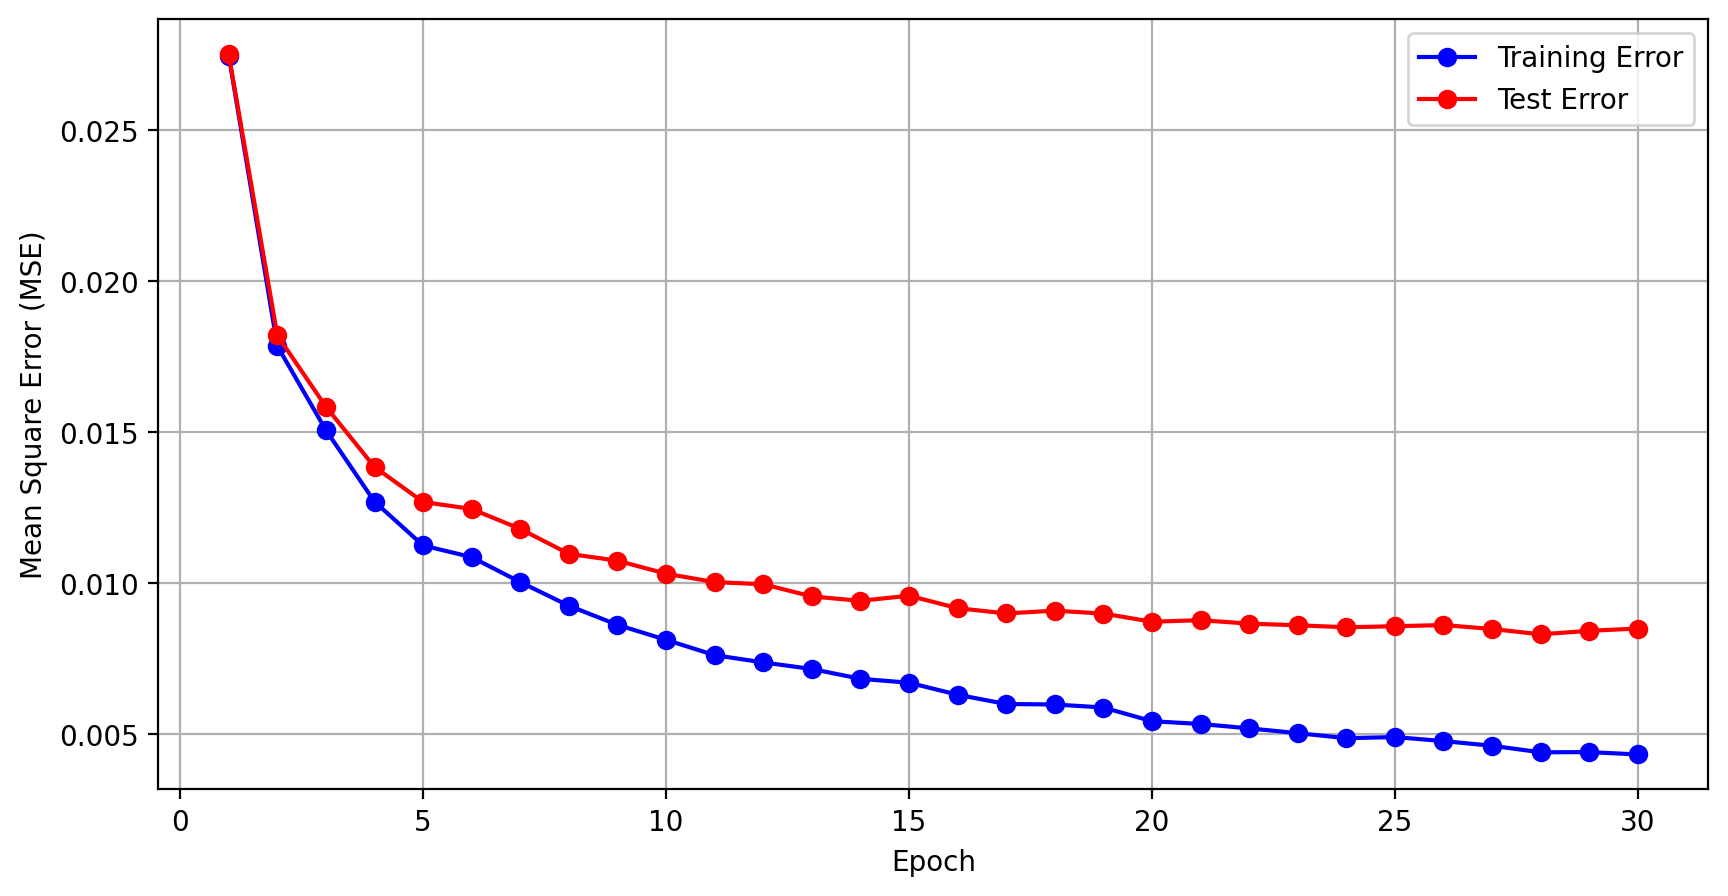

In [ ]:
# 학습 및 테스트 에러 시각화하기
plt.figure(figsize=(10, 5))
plt.plot(range(1,n_epochs+1), training_result_mse[0], 'bo-', label='Training Error')
plt.plot(range(1,n_epochs+1), training_result_mse[1], 'ro-', label='Test Error')
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error (MSE)')
plt.grid(True)
plt.legend()
plt.show()

#### 👨‍💻 <font color='green'><b>[ 코드 ]</b></font> 학습 곡선 그리기 - CE


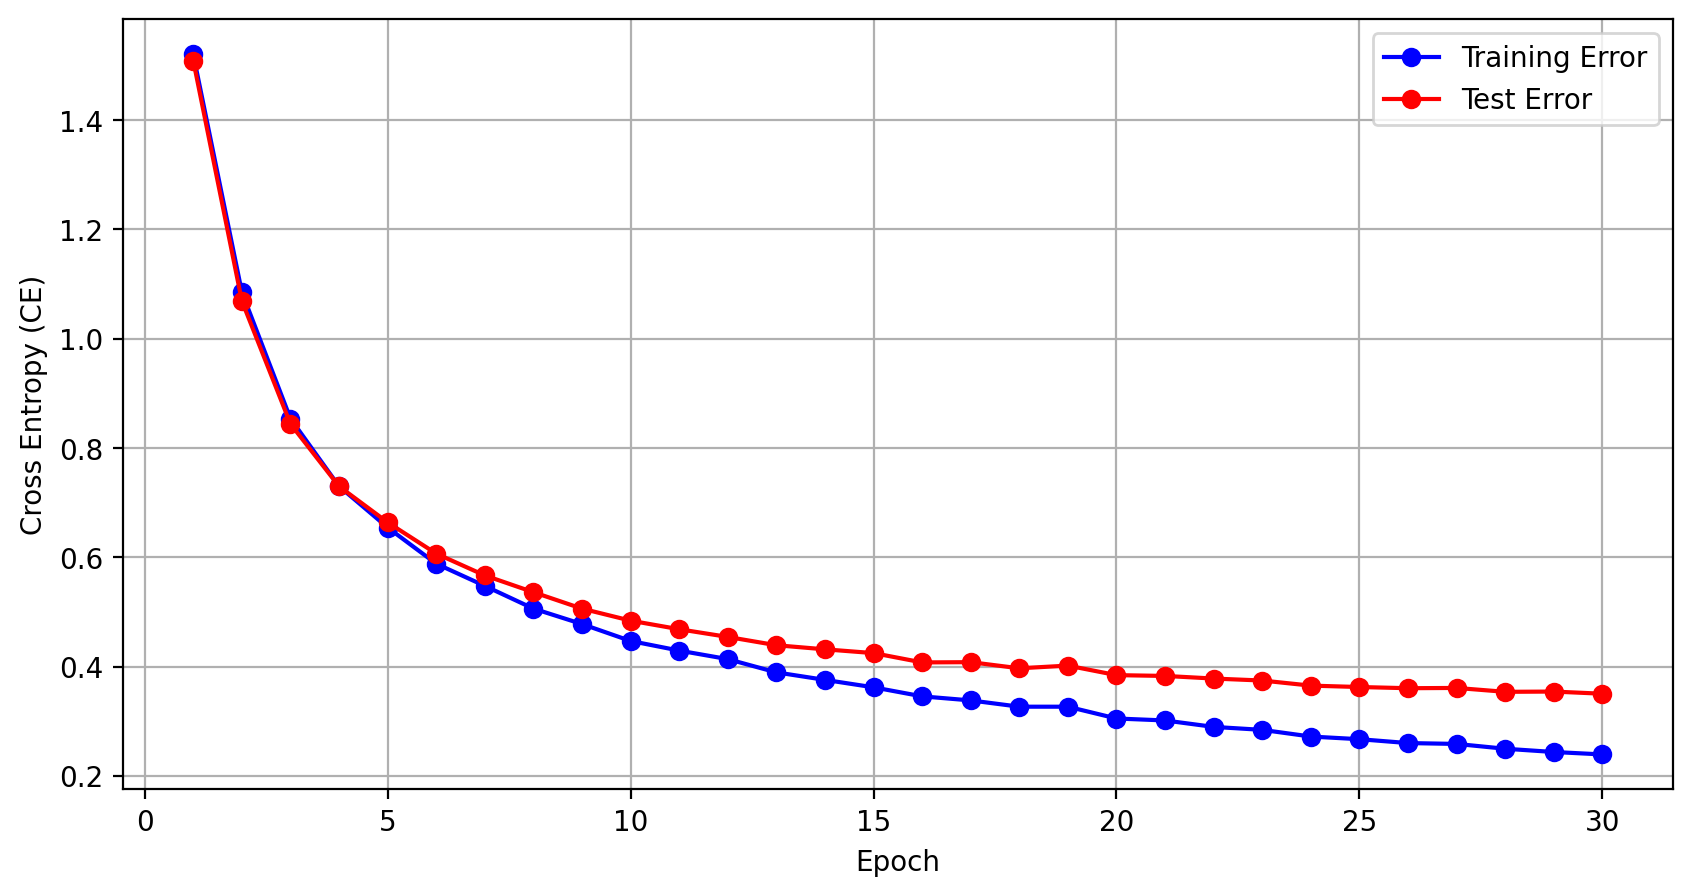

In [ ]:
# 학습 및 테스트 에러 시각화하기
plt.figure(figsize=(10, 5))
plt.plot(range(1,n_epochs+1), training_result_ce[0], 'bo-', label='Training Error')
plt.plot(range(1,n_epochs+1), training_result_ce[1], 'ro-', label='Test Error')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy (CE)')
plt.grid(True)
plt.legend()
plt.show()

#### 👨‍💻 <font color='green'><b>[ 코드 ]</b></font> 학습 곡선 그리기 - 정확도


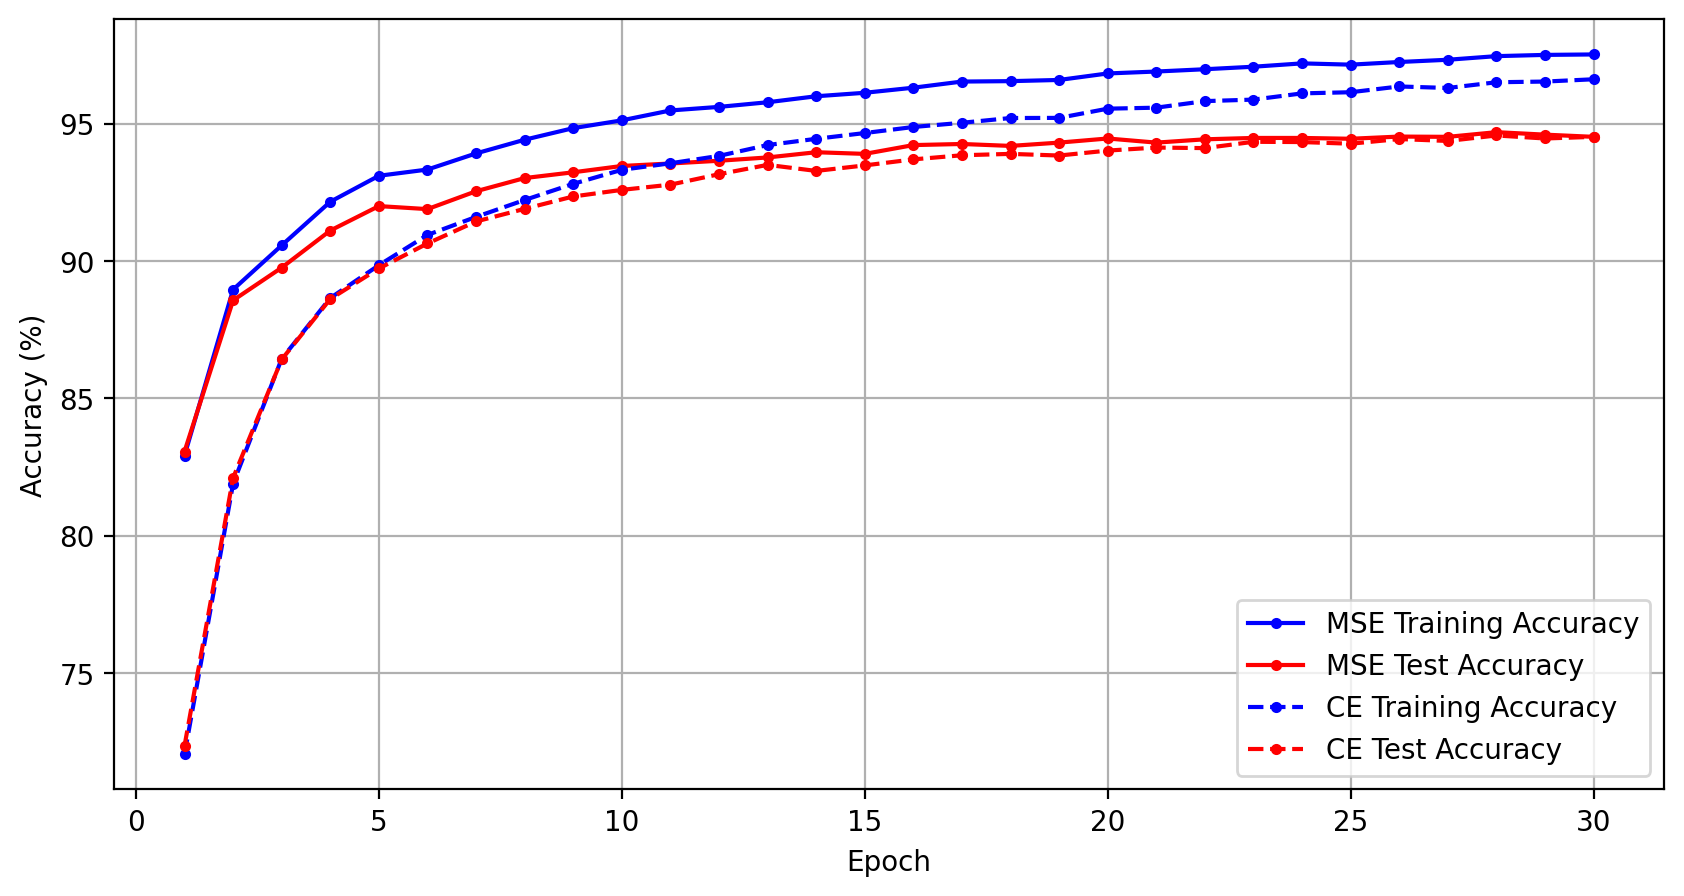

In [ ]:
# 학습 및 테스트 정확도 시각화하기
plt.figure(figsize=(10, 5))
plt.plot(range(1,n_epochs+1), training_result_mse[2]*100, 'b.-', label='MSE Training Accuracy')
plt.plot(range(1,n_epochs+1), training_result_mse[3]*100, 'r.-', label='MSE Test Accuracy')
plt.plot(range(1,n_epochs+1), training_result_ce[2]*100, 'b.--', label='CE Training Accuracy')
plt.plot(range(1,n_epochs+1), training_result_ce[3]*100, 'r.--', label='CE Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.legend()
plt.show()

### 4-2. 일부 데이터 시각화

> 데이터 샘플 일부를 추출하여 시각화함으로써 모델의 성능에 대한 보다 직관적인 이해를 할 수 있습니다.
>
> 본 실습에서는 간단하게 25개의 데이터 샘플에 대해 실제값과 예측값을 프린트해봅니다.
> <br>(MSE 손실 함수를 사용한 모델을 사용)

- 👨‍💻 <font color='green'><b>[ 코드 ]</b></font> 임의의 25개 샘플 시각화하기
- 👨‍💻 <font color='green'><b>[ 코드 ]</b></font> 정답과 다르게 예측한 25개 샘플 시각화하기

#### 👨‍💻 <font color='green'><b>[ 코드 ]</b></font> 임의의 25개 샘플 시각화하기


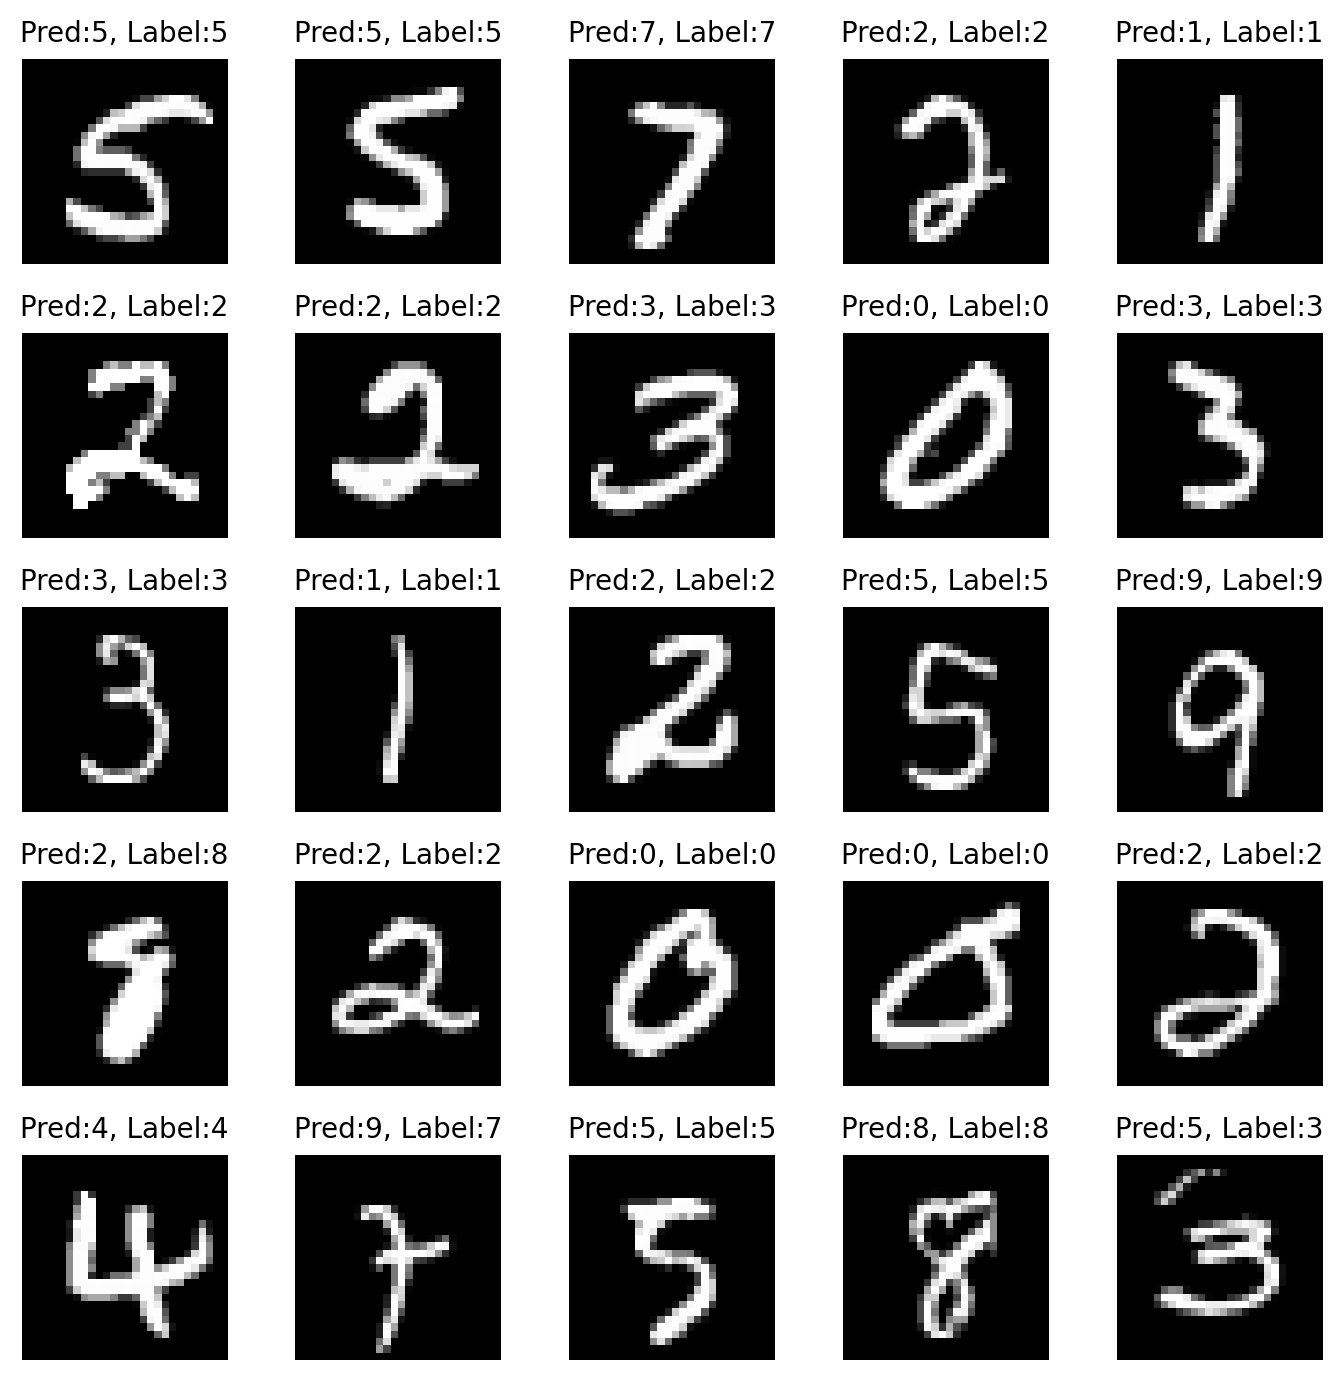

In [ ]:
# 25개의 임의의 테스트 데이터에 대한 분류 결과 시각화하기
n_sample = 25  # number of samples

# 테스트셋으로부터 임의의 25개의 이미지 추출 및 이에 대응하는 라벨과 모델 결과 생성
sample_indices = np.random.choice(len(y_test), n_sample, replace=False)
sample_images = X_test[sample_indices].reshape((-1,28,28))
sample_labels = np.argmax(y_test[sample_indices], axis=1)
sample_pred = np.argmax(mlp_mse.predict(X_test[sample_indices]), axis=1)

# 7x7 사이즈의 새로운 figure 생성
plt.figure(figsize=(7,7))
for idx in range(n_sample):
    # 5x5 그리드의 (idx+1)번째 위치에 그래이스케일 이미지를 출력
    # 타이틀로는 모델의 예측값과 실제값을 출력
    plt.subplot(5, 5, idx+1)
    plt.imshow(sample_images[idx], cmap='gray')
    plt.axis('off')
    plt.title("Pred:%d, Label:%d"%(sample_pred[idx], sample_labels[idx]), fontsize=10)

plt.tight_layout()
plt.show()


#### 👨‍💻 <font color='green'><b>[ 코드 ]</b></font> 정답과 다르게 예측한 25개 샘플 시각화하기


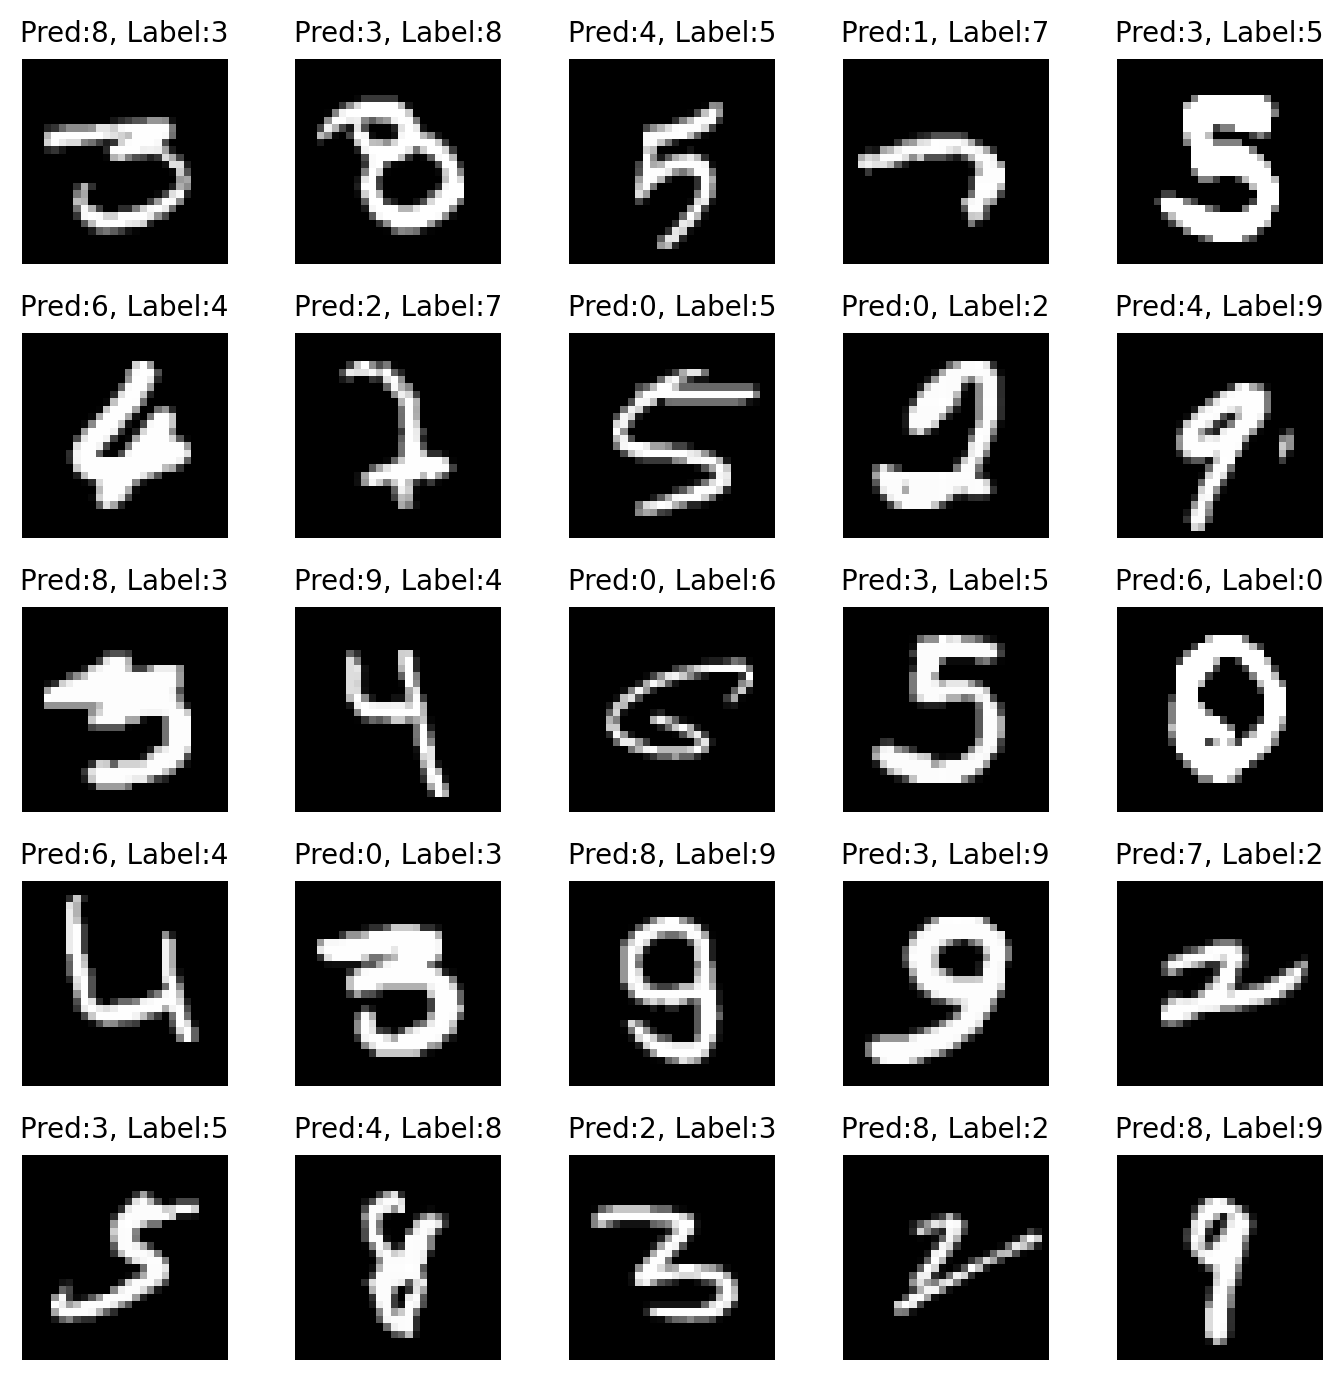

In [ ]:
# 25개의 오답 데이터에 대한 분류 결과 시각화하기
n_sample = 25  # number of samples

# 테스트셋으로부터 틀린 25개의 이미지 추출 및 이에 대응하는 라벨과 모델 결과 생성
pred_result = np.argmax(mlp_mse.predict(X_test), axis=1)
wrong_indices = np.where(pred_result != np.argmax(y_test, axis=1))[0]
sample_indices = np.random.choice(wrong_indices, n_sample, replace=False)
sample_images = X_test[sample_indices].reshape((-1,28,28))
sample_labels = np.argmax(y_test[sample_indices], axis=1)
sample_pred = pred_result[sample_indices]

# 7x7 사이즈의 새로운 figure 생성
plt.figure(figsize=(7,7))
for idx in range(n_sample):
    # 5x5 그리드의 (idx+1)번째 위치에 그래이스케일 이미지를 출력
    # 타이틀로는 모델의 예측값과 실제값을 출력
    plt.subplot(5, 5, idx+1)
    plt.imshow(sample_images[idx], cmap='gray')
    plt.axis('off')
    plt.title("Pred:%d, Label:%d"%(sample_pred[idx], sample_labels[idx]), fontsize=10)

plt.tight_layout()
plt.show()


#Reference

- [MNIST 데이터셋 이미지 출처](https://upload.wikimedia.org/wikipedia/commons/f/f7/MnistExamplesModified.png)
- [hwalsuklee/numpy-neuralnet-exercise](https://github.com/hwalsuklee/numpy-neuralnet-exercise)

## Required Package

numpy version >= 1.23.5 <br>
matplotlib version >= 3.7.1




## 콘텐츠 라이선스

저작권 : <font color='blue'> <b> ©2023 by Upstage X fastcampus Co., Ltd. All rights reserved.</font></b>

<font color='red'><b>WARNING</font> : 본 교육 콘텐츠의 지식재산권은 업스테이지 및 패스트캠퍼스에 귀속됩니다. 본 콘텐츠를 어떠한 경로로든 외부로 유출 및 수정하는 행위를 엄격히 금합니다. </b>